In [1]:
import glob
import os
import scipy
import scipy.io as sio

import matplotlib.pyplot as plt
import numpy as np


from distortion_correction_gpu_direct import distortion_correction


positive_list = sio.loadmat('/home/naxos2-raid1/taylor/Data/MP-ssfp/MP_SSFP_3D_TWF-D20220928T144430_pos/Data/data.mat')
negative_list = sio.loadmat('/home/naxos2-raid1/taylor/Data/MP-ssfp/MP_SSFP_3D_TWF-D20220928T144726_neg/Data/data.mat')

positive_volume_k = positive_list['data']
negative_volume_k = negative_list['data']

positive_volume_k = positive_volume_k[0,:,:,1:]
negative_volume_k = negative_volume_k[0,:,:,1:]


positive_volume = np.fft.fftshift(positive_volume_k,axes=(1,2))
positive_volume = np.fft.fft2(positive_volume)
positive_volume = np.abs(np.fft.fftshift(positive_volume,axes=(1,2)))

negative_volume = np.fft.fftshift(negative_volume_k,axes=(1,2))
negative_volume = np.fft.fft2(negative_volume)
negative_volume = np.abs(np.fft.fftshift(negative_volume,axes=(1,2)))

In [2]:
list1 = np.shape(positive_list['data'])
list2 = np.shape(negative_list['data'])
print("Positive Shape: " + str(list1) + ", Negative Shape: "+ str(list2))

Positive Shape: (1, 32, 96, 129), Negative Shape: (1, 32, 96, 129)


In [3]:
volume1 = np.shape(positive_volume)
volume2 = np.shape(negative_volume)
print("Positive Shape: " + str(volume1) + ", Negative Shape: "+ str(volume2))

Positive Shape: (32, 96, 128), Negative Shape: (32, 96, 128)


Text(0.5, 1.0, 'Negative Volume')

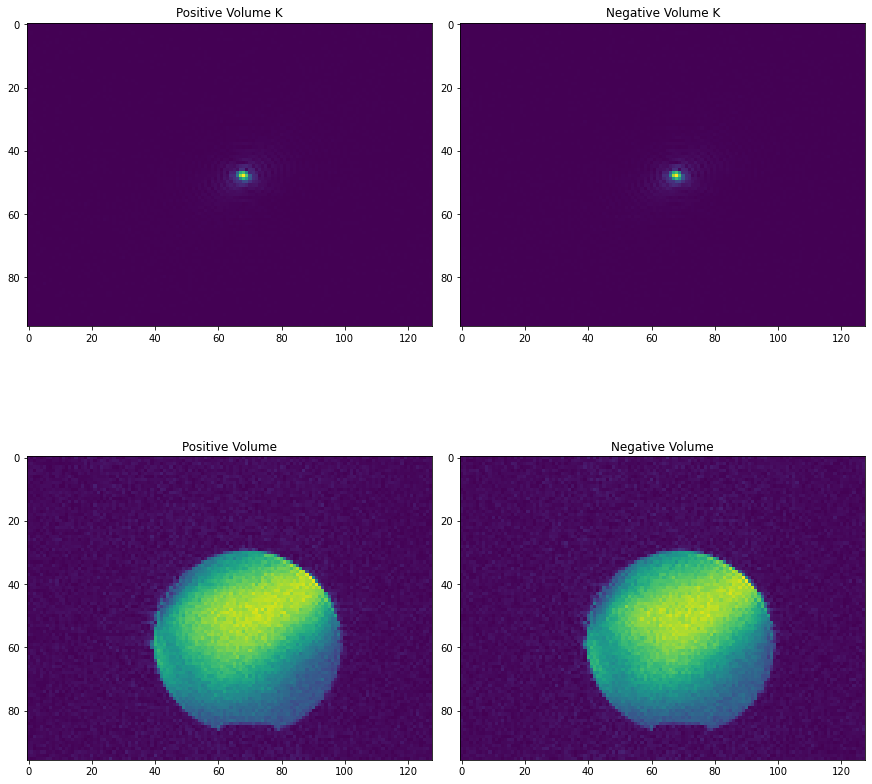

In [4]:
idx = 14

fig = plt.figure(constrained_layout=True, figsize=(12, 12))
axs = fig.subplots(2, 2)

axs[0,0].imshow(np.abs(positive_volume_k[idx,:,:]))
axs[0,0].set_title('Positive Volume K')

axs[0,1].imshow(np.abs(negative_volume_k[idx,:,:]))
axs[0,1].set_title('Negative Volume K')

axs[1,0].imshow(np.abs(positive_volume[idx,:,:]))
axs[1,0].set_title('Positive Volume')

axs[1,1].imshow(np.abs(negative_volume[idx,:,:]))
axs[1,1].set_title('Negative Volume')

In [5]:
max_val = np.max((np.max(abs(positive_volume)), np.max(abs(negative_volume))))
positive_volume /= max_val
negative_volume /= max_val

Text(0.5, 1.0, 'Negative Volume')

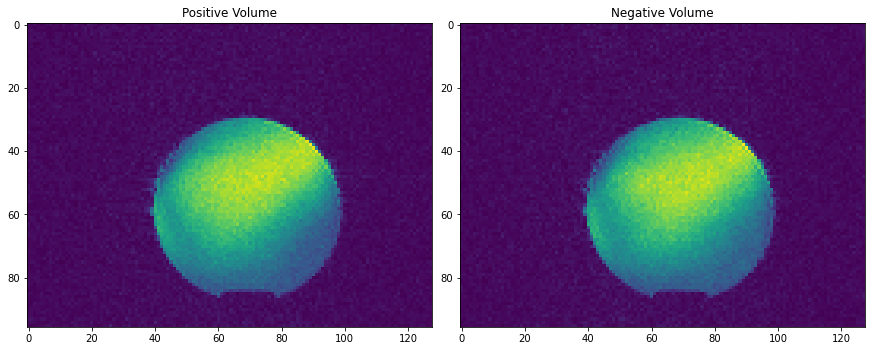

In [6]:
idx = 14

fig = plt.figure(constrained_layout=True, figsize=(12, 12))
axs = fig.subplots(1, 2)

axs[0].imshow(np.abs(positive_volume[idx,:,:]))
axs[0].set_title('Positive Volume')

axs[1].imshow(np.abs(negative_volume[idx,:,:]))
axs[1].set_title('Negative Volume')

In [7]:
dc_3mm = distortion_correction(spline_spacing=np.array([4, 2, 2]), image_size=positive_volume.shape)
Ic_3mm, Tx_3mm, x_3mm = dc_3mm.run(positive_volume, negative_volume)

iter = 0 	 norm(grad) = 1.276328 

iter = 1 	 norm(grad) = 1.276328 	 cost = 186.424150 

iter = 2 	 norm(grad) = 1.191352 	 cost = 240.417421 

iter = 3 	 norm(grad) = 1.076127 	 cost = 240.763495 

iter = 4 	 norm(grad) = 0.954667 	 cost = 239.968829 

iter = 5 	 norm(grad) = 0.846955 	 cost = 239.974330 

iter = 6 	 norm(grad) = 0.750703 	 cost = 239.385546 

iter = 7 	 norm(grad) = 0.678593 	 cost = 239.114251 

iter = 8 	 norm(grad) = 0.616496 	 cost = 238.708517 

iter = 9 	 norm(grad) = 0.581651 	 cost = 238.219238 

iter = 10 	 norm(grad) = 0.538240 	 cost = 237.923550 

iter = 11 	 norm(grad) = 0.512228 	 cost = 237.502564 

iter = 12 	 norm(grad) = 0.482148 	 cost = 237.175192 

iter = 13 	 norm(grad) = 0.462445 	 cost = 236.917406 

iter = 14 	 norm(grad) = 0.441163 	 cost = 236.353123 

iter = 15 	 norm(grad) = 0.426969 	 cost = 236.186562 

iter = 16 	 norm(grad) = 0.401689 	 cost = 235.957534 

iter = 17 	 norm(grad) = 0.384311 	 cost = 235.576891 

iter = 18 	 norm(grad)

iter = 157 	 norm(grad) = 0.100680 	 cost = 209.032306 

iter = 158 	 norm(grad) = 0.099533 	 cost = 208.890133 

iter = 159 	 norm(grad) = 0.097400 	 cost = 208.735898 

iter = 160 	 norm(grad) = 0.097721 	 cost = 208.527437 

iter = 161 	 norm(grad) = 0.096232 	 cost = 208.418081 

iter = 162 	 norm(grad) = 0.095390 	 cost = 208.229245 

iter = 163 	 norm(grad) = 0.094536 	 cost = 208.046155 

iter = 164 	 norm(grad) = 0.092950 	 cost = 207.807565 

iter = 165 	 norm(grad) = 0.092130 	 cost = 207.705866 

iter = 166 	 norm(grad) = 0.091778 	 cost = 207.559534 

iter = 167 	 norm(grad) = 0.092965 	 cost = 207.372803 

iter = 168 	 norm(grad) = 0.091608 	 cost = 207.175470 

iter = 169 	 norm(grad) = 0.091998 	 cost = 207.006162 

iter = 170 	 norm(grad) = 0.095430 	 cost = 206.958559 

iter = 171 	 norm(grad) = 0.095516 	 cost = 206.793355 

iter = 172 	 norm(grad) = 0.096827 	 cost = 206.682314 

iter = 173 	 norm(grad) = 0.098430 	 cost = 206.438699 

iter = 174 	 norm(grad) = 0.099

Text(0.5, 1.0, 'Tx, 3mm')

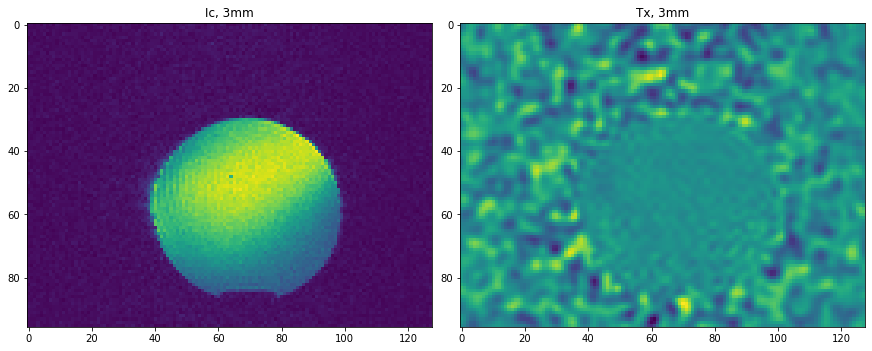

In [8]:
idx = 10

fig = plt.figure(constrained_layout=True, figsize=(12, 12))
axs = fig.subplots(1, 2)

axs[0].imshow(Ic_3mm[idx,:,:])
axs[0].set_title('Ic, 3mm')
axs[1].imshow(Tx_3mm[idx,:,:])
axs[1].set_title('Tx, 3mm')


Text(0.5, 1.0, 'Tx, 3mm')

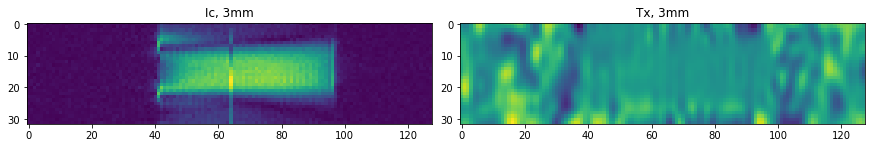

In [9]:
idx = int(96/2)

fig = plt.figure(constrained_layout=True, figsize=(12, 12))
axs = fig.subplots(1, 2)

axs[0].imshow(Ic_3mm[:,idx,:])
axs[0].set_title('Ic, 3mm')
axs[1].imshow(Tx_3mm[:,idx,:])
axs[1].set_title('Tx, 3mm')

In [10]:
out = {"B0map": Tx_3mm, "label": "B0map"}
sio.savemat("test_map.mat", out)